Cost :  0.22062546682241552
Eabs : 0.4333528713271704
Erms : 0.0629711374428195


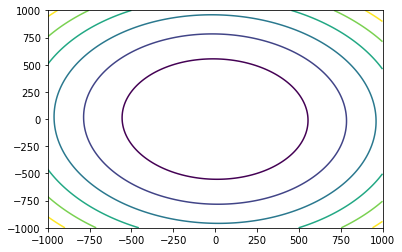

In [30]:
"""
    Multivariate Linear Regression
    ---with lasso and ridge regularization
    ---with Z-Score and min-max normalization
    ---plotted contour of theta(1) and theta(2) with respect to cost function
"""

"""
    Command Line Input :
        python3 mvlr.py [filename] [number of rows to be skipped (default=1)] [delimiter (default=space)]
"""

import matplotlib.pyplot as plt
import numpy as np
import math

"""
    Squared Error
        x      : training data
        y      : outputs
        th     : theta 
        lb     : lambda value for regularization
        reg    : regularization function

"""
def cost(x, y, th, lb = 0, reg = None):
    diff = x @ th - y
    t = (1 / (2 * x.shape[0])) * diff.transpose() @ diff + (0 if reg == None else reg(lb, th))
    ans = np.squeeze(t)
    return ans

"""
    Gradient Descent
        x      : training data
        y      : outputs
        th     : theta
        lb     : lambda value for regularization
        reg    : regularization function
        regder : regularization function derivative
"""
def gr_dsc(x, y, th, lb = 0, reg = None, regder = None):
    iters = 10000
    alpha = 0.001
    while(iters != 0) :
        th = th - alpha*(x.transpose() @ (x @ th - y) + (0 if regder == None else regder(lb, th)))
        iters -= 1
    print("Cost : ", cost(x, y, th, lb, reg))
    return th
    
"""
    Lasso regularization
        th : theta
        lb : lambda value for regularization
"""
def lasso_reg(lb, th):
    a = 0;
    for i in th:
        a = a + abs(i)
    return a * lb

"""
    Lasso regularization derivative
        th : theta
        lb : lambda value for regularization
"""
def lasso_regder(lb, th):
    return lb * th / abs(th)

"""
    Ridge regularization
        th : theta
        lb : lambda value for regularization
"""
def ridge_reg(lb, th):
    return (lb / 2) * np.squeeze(th.transpose() @ th)

"""
    Ridge regularization derivative
        th : theta
        lb : lambda value for regularization
"""
def ridge_regder(lb, th):
    return lb * th

"""
    Plots Cost vs theta(i) for all theta
        x      : training data
        y      : outputs
        th     : theta
"""
def plotter(x, y, th):
    ti = np.linspace(-10, 10, num=1000)
    for i in range(th.shape[0]):
        th1 = np.copy(th)
        jv = []
        for j in ti:
            th1[i][0] = j
            jv.append(cost(x, y, th1))
        print(min(jv))
        plt.plot(ti, jv)
        plt.show()
"""
    Contour plots
        x      : training data
        y      : outputs
        th     : theta
"""
def contour(x, y, th):
    th1 = np.linspace(-1000, 1000, num=1000)
    th2 = np.linspace(-1000, 1000, num=1000)
    TH1, TH2 = np.meshgrid(th1, th2)
    
    th_copy = th.copy()
    jv = np.zeros((len(th1), len(th2)))
    for i in range(0,len(th1)):
        th_copy[1][0] = th1[i]
        for j in range(0, len(th2)):
            th_copy[2][0] = th2[j]
            jv[i][j] = cost(x, y, th_copy)
    
    plt.contour(TH1, TH2, jv)
    plt.show()
            
    
"""
    Error calculation
        x      : testing data
        y      : outputs
        th     : theta 
"""

def error_calculations(x, y, th):
    diff = x @ th - y
    sum_of_squared_errors = diff.transpose() @ diff
    Eabs = sum(np.absolute(diff)) / x.shape[0]
    Erms = math.sqrt(sum_of_squared_errors[0][0]) / x.shape[0]
    print("Eabs : {}".format(Eabs[0]))
    print("Erms : {}".format(Erms))
    
    
#file name for data
f_name = "real_estate.csv"
data = np.genfromtxt(f_name, delimiter=",", skip_header=1)

rows = data.shape[0]
columns = data.shape[1]

th = np.ones((columns, 1))
x = np.ones((rows, columns))
y = np.zeros((rows, 1))
x_normalized = np.ones((rows, columns))
y_normalized = np.zeros((rows, 1))

#min and max for all columns
mins = data.min(axis=0)
maxs = data.max(axis=0)
means = data.mean(axis = 0)
std = data.std(axis = 0)

#normalize
"""
#Min Max normalization

for i in range(columns):
    if i == columns - 1:
        for j in range(rows):
            y_normalized[j][0] = (data[j][i] - mins[i])/(maxs[i] - mins[i])
            y[j][0] = data[j][i]
    else :
        for j in range(rows):
            x_normalized[j][i + 1] = (data[j][i] - mins[i])/(maxs[i] - mins[i])
            x[j][i + 1] = data[j][i]
"""

#Z-Score Normalization
for i in range(columns):
    if i == columns - 1:
        for j in range(rows):
            y_normalized[j][0] = (data[j][i] - means[i])/(std[i])
            y[j][0] = data[j][i]
    else :
        for j in range(rows):
            x_normalized[j][i + 1] = (data[j][i] - means[i])/(std[i])
            x[j][i + 1] = data[j][i]

#splitting into learning and testing sets
x_learning = x_normalized[:int(0.8*rows) + 1,:]
x_testing = x_normalized[int(0.8*rows) + 1:,:]
y_learning = y_normalized[:int(0.8*rows) + 1,:]
y_testing = y_normalized[int(0.8*rows) + 1:,:]
th_copy = th.copy()

th_copy = gr_dsc(x_learning, y_learning, th_copy)

error_calculations(x_testing, y_testing, th_copy)

contour(x_learning, y_learning, th_copy)